In [2]:
#load in relevant library's
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from scipy.stats import ttest_ind

In [3]:
#convert the two databases from csv to dataframes, the second dataframe needs to be seperated on ; because it's not a normal CSV
df1 = pd.read_csv("survey data.csv")
df2 = pd.read_csv("steps data2.csv", sep=";")

In [4]:
#merge the dataframes based on the row id, so the data gets the right allignment
df3 = pd.merge(df1, df2, on = "id")

In [5]:
#print out the head of the dataframe
df3.head()

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Lyon,male,25-34,3,single parent,bachelor,182.0,85.0,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Bordeaux,male,25-34,2,couple,master or doctorate,177.0,70.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#getting the mean of steps per day
df_steps = df2.mean()

In [7]:
#here we do multiple things, we want the total steps per person, so we can actually research our indepedent en dependend variables. We loop over the steps data and count the sum of
#numeric values, we substract the id, because it's counted as a nummer as well. Then we append the total steps and id to a new list so we can merge it with our current dataframe.
empty_list =[]
for index, row in df2.iterrows():
    item = {
        "total_steps" : row.sum() - row["id"],
        "mean_steps" : row[1:].mean(),
        "id" : row["id"]
    }
    empty_list.append(item)
df4 = pd.DataFrame(empty_list)

In [8]:
#here we merge the new dataframe to get our totalsteps as a new collom
def above_1(x):
    if(x == 0.0): 
        return float('NaN')
    else: 
        return x
df4["total steps"] = df4["total_steps"].apply(above_1)
df5 = pd.merge(df3, df4, on = "id")


C:\Users\ArjenZwep\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


[Text(0,0.5,'overall mean steps'), Text(0.5,0,'days')]

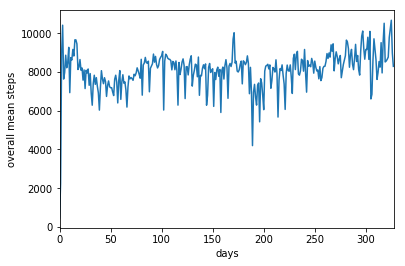

In [9]:
#setting the timetable for mean steps per day
timeplot = sns.tsplot(data=df_steps)
timeplot.set(xlabel = "days", ylabel ="overall mean steps")

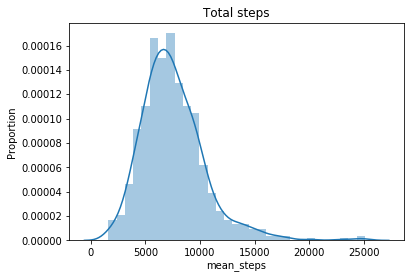

In [10]:
#plotting a desinty plot of the total steps. We remove the outliers to make the graphs clearer
file_size2 = df5["mean_steps"].dropna()
file_size2 = file_size2[file_size2 > 1000]
sns.distplot(file_size2)
plt.title('Total steps')
plt.ylabel('Proportion')
plt.show()

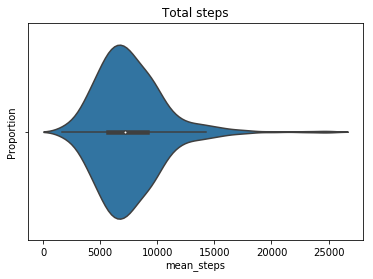

In [11]:
#plotting a violinplot of the totalsteps
file_size3 = df5['total steps'].dropna()
sns.violinplot(file_size2)
plt.title('Total steps')
plt.ylabel('Proportion')
plt.show()

In [12]:
#getting extra statistics and observing the data
print(df5['mean_steps'].mean())
print(df5['mean_steps'].max())

7496.398476348804
25087.657142857144


#### Observing the qualitive vs qualitve variables graphs
we can see the model is skewed to the right, however this is not a big difference, we can see some outliers causing this.
With the mean being 5.7k, while there is still a visible group that is more around the 12k-13k, with the highest even going to 24,9k

In [13]:
#finding correlation between 3 quantitave variables and showing it in a correlation matrix. This matrix shows us the pearson correlations of the variables
df_quant = df5[["height","weight","mean_steps"]]
#plt.matshow(
df_quant.corr(method = "pearson")

,height,weight,mean_steps
height,1.000000,0.566777,-0.093685
weight,0.566777,1.000000,-0.169415
mean_steps,-0.093685,-0.169415,1.000000


#### observing the correlations
As we can see both variables are not really strongly related to mean_steps a day. Weight has te strongest relation with the mean_steps. In the scatterplots you can also the the relation with weight a little bit more. But both don't really have a visible linairity

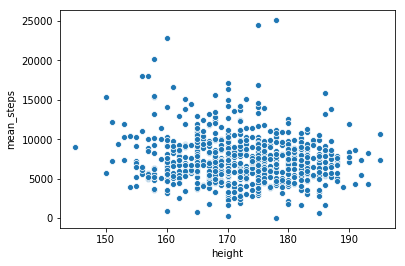

In [14]:
#scatterplot the correlation between height and mean_steps
sns.scatterplot(x = "height", y = "mean_steps", data=df5)

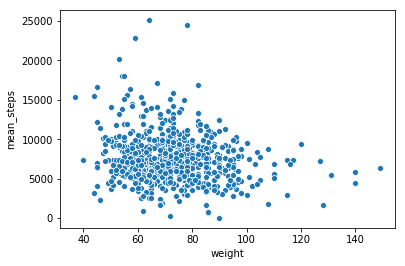

In [15]:
#scatterplot the correlation between weight and mean_steps
sns.scatterplot(x = "weight", y = "mean_steps", data=df5)

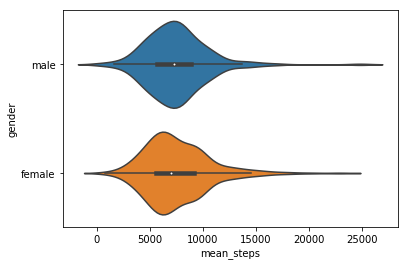

In [16]:
#plotting the difference between mean_steps and gender
sns.violinplot(x = "mean_steps", y = "gender", data=df5)

In [17]:
#making 2 dataframes for both genders and meassuring the difference
male = df5[df5['gender']=='male']
female = df5[df5['gender']=='female']
ttest_ind(male['mean_steps'], female['mean_steps'], nan_policy='omit')

Ttest_indResult(statistic=-0.2858852768689861, pvalue=0.7750493786893655)

#### observing the results of T-test

If we look at our P-value, we can see it is far above the 0,05 point. A high P-value means the difference is really insignificant, so there is no noteable difference between
how many steps man take versus women.

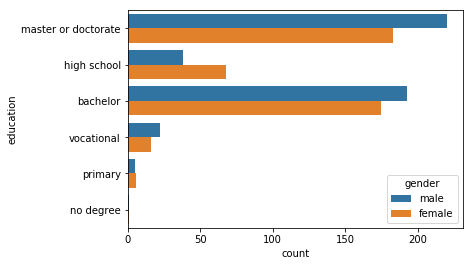

In [18]:
#making a countplot so we can compare 2 qualitive variables, gender with education
sns.countplot(y = "education", hue = "gender", data=df5)

In [19]:
#getting a crosstable with absolute numbers
pd.crosstab(df5["education"], df5["gender"], margins=True, margins_name="Total") #.apply(lambda r: r/r.sum(), axis = 1)

gender,female,male,Total
education,,,
bachelor,175,193,368
high school,68,38,106
master or doctorate,183,220,403
no degree,1,1,2
primary,6,5,11
vocational,16,22,38
Total,449,479,928


In [20]:
#getting a crosstable with the precentages per catergory
pd.crosstab(df5["education"], df5["gender"], normalize = "index")

gender,female,male
education,,
bachelor,0.475543,0.524457
high school,0.641509,0.358491
master or doctorate,0.454094,0.545906
no degree,0.500000,0.500000
primary,0.545455,0.454545
vocational,0.421053,0.578947


#### observating the relation between gender and education

If we look at these two variables, we can see that more males are getting a higher degree after high school. We can see a higher percentage in all forms of education after 
highschool for males. While the percentage just having a highschool degree is higher in females.

#### obeservating all of our findings

If we look at all our findings, we did not the most relevant variables for our mean_steps. We haven't found strong correlations which would influence the mean_steps. So if you would later like to fit a model you would have to look at the other variables. Furthermore the most interesting finding is about males being generally higher educated than women. This of course has nothing to do with the mean steps, but that is the interesting thing about data, you find connections which you can research further.